In [1]:
import os
from os.path import join

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('paper.mcstyle')
import seaborn as sns
import pandas as pd

import numpy as np

In [2]:
import ili
from ili.dataloaders import StaticNumpyLoader
from ili.validation.runner import ValidationRunner

## NPE/NLE/NRE/DELFI toy comparison

In [3]:
# Load data
cfgdir = '/home/mattho/git/ltu-ili/paper/configs/toy_model/'
wdir = '/home/mattho/git/ltu-ili/paper/wdir'
imdir = '/home/mattho/git/ltu-ili/paper/images'

os.chdir(wdir)

In [21]:
all_loader = StaticNumpyLoader.from_config(join(cfgdir, "data.yaml"))
x, theta = all_loader.get_all_data(), all_loader.get_all_parameters()

np.random.seed(12345)
ind = np.random.choice(len(x))
x_obs = x[ind]
theta_obs = theta[ind]
ndim = theta.shape[1]

samples = {}
models = ['NPE', 'NLE', 'NRE']
for m in models:
    samples[m] = np.load(join(wdir, 'toy', f'toy_S{m}_single_samples.npy'))
models += ['pydelfi']
samples['pydelfi'] = np.load(join(wdir, 'toy', f'single_samples.npy'))

In [32]:
cols = [f"$\\theta_{i}$" for i in range(3)]
sampdf = [
    pd.DataFrame(samples[m], columns=cols)
    for m in models
]
for i in range(len(models)):
    sampdf[i]['Toy Model'] = models[i]
    # sampdf[i]['weight'] = 1/len(samples[models[i]])
sampdf = pd.concat(sampdf)

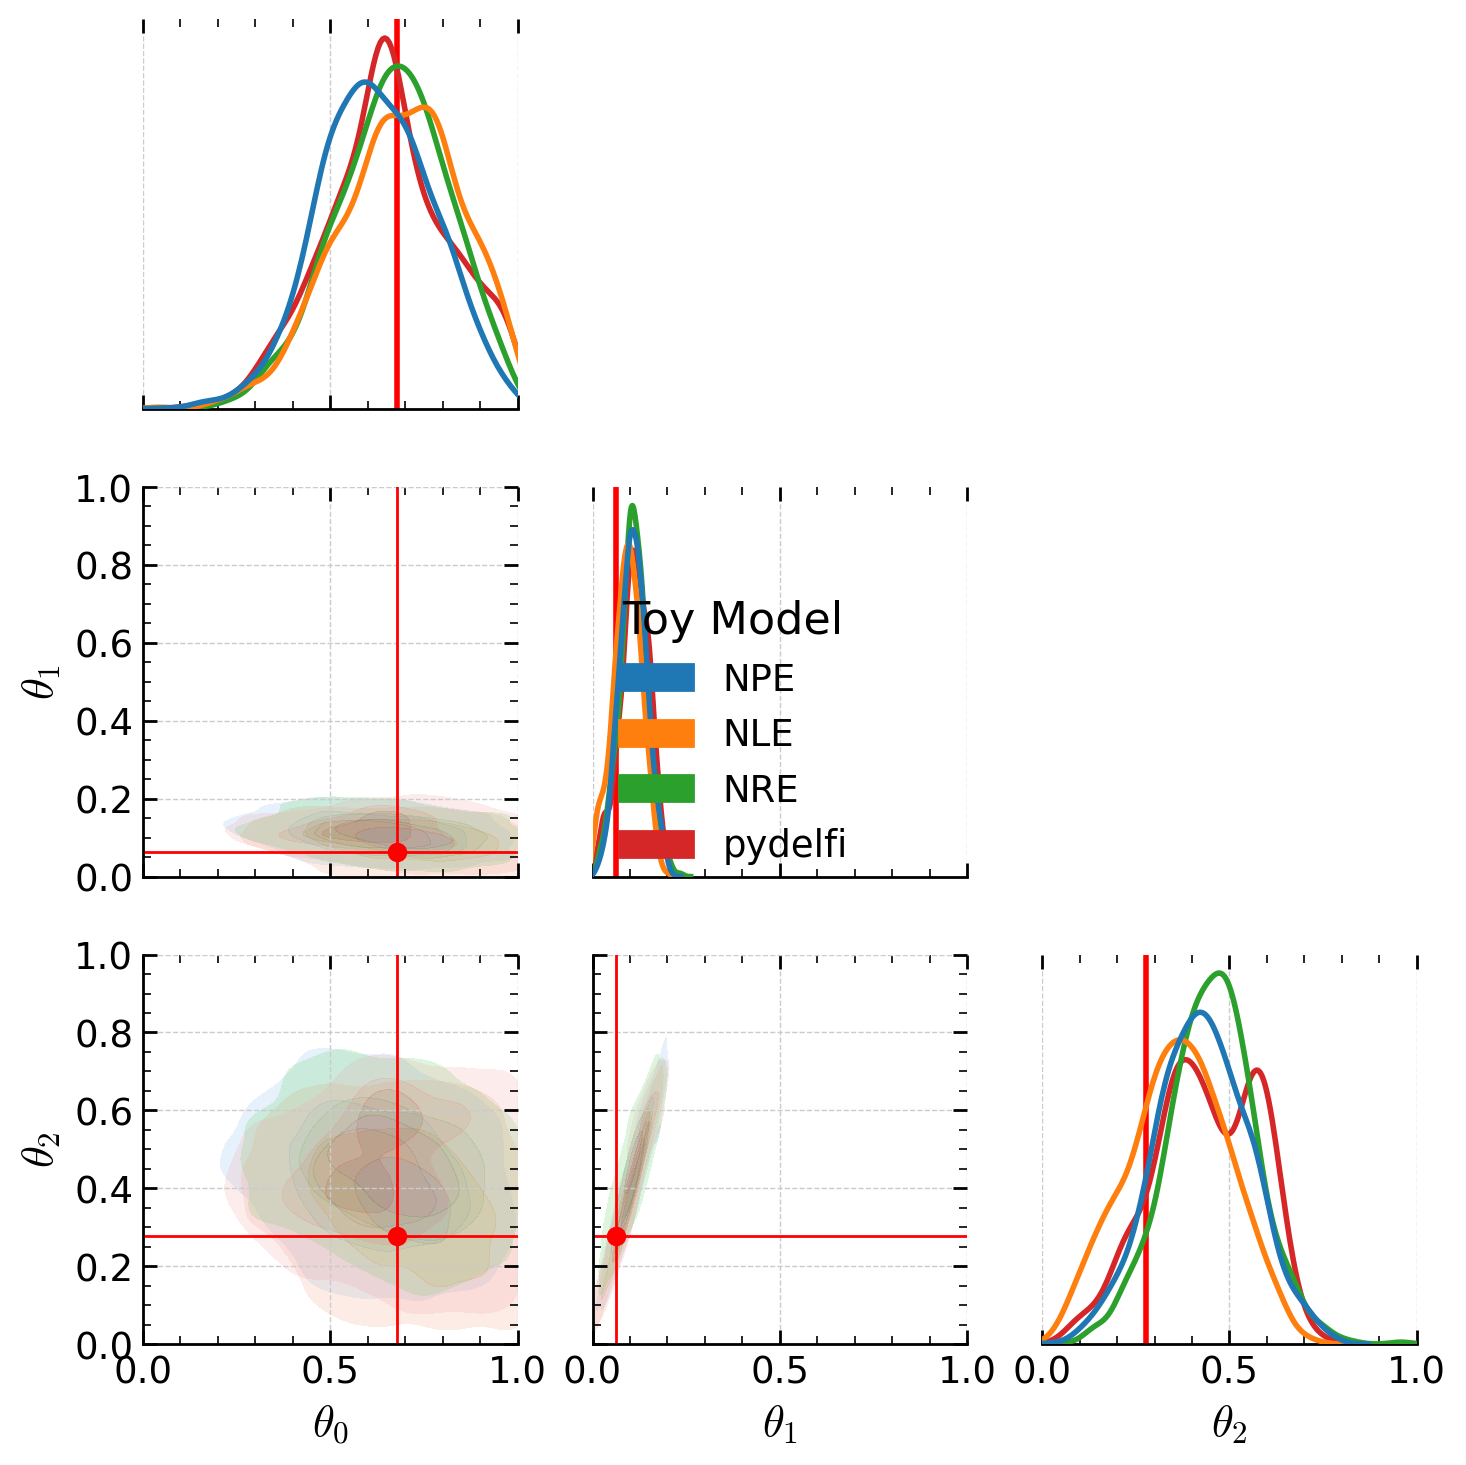

In [35]:
g = sns.pairplot(
    sampdf,
    hue='Toy Model',
    kind='kde',
    diag_kind='kde',
    plot_kws=dict(alpha=0.2, levels=4, fill=True),
    diag_kws=dict(linewidth=2, fill=False),
    palette=None, # 'colorblind',
    corner=True,
)
# plot the true value
for i in range(ndim):
    for j in range(i + 1):
        if i == j:
            g.axes[i, i].axvline(theta_obs[i], lw=2, color="r")
            g.axes[i, i].set_xlim(0, 1)
        else:
            g.axes[i, j].axhline(theta_obs[i], lw=1, color="r")
            g.axes[i, j].axvline(theta_obs[j], lw=1, color="r")
            g.axes[i, j].plot(theta_obs[j], theta_obs[i], "ro")
            g.axes[i, j].set_xlim(0, 1)
            g.axes[i, j].set_ylim(0, 1)
sns.move_legend(g, "center")
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
g.savefig(join(imdir, 'corner_compare.jpg'))

NPE (1500, 3)
NLE (1500, 3)
NRE (1500, 3)
pydelfi (1504, 3)


(0.0, 1.0)

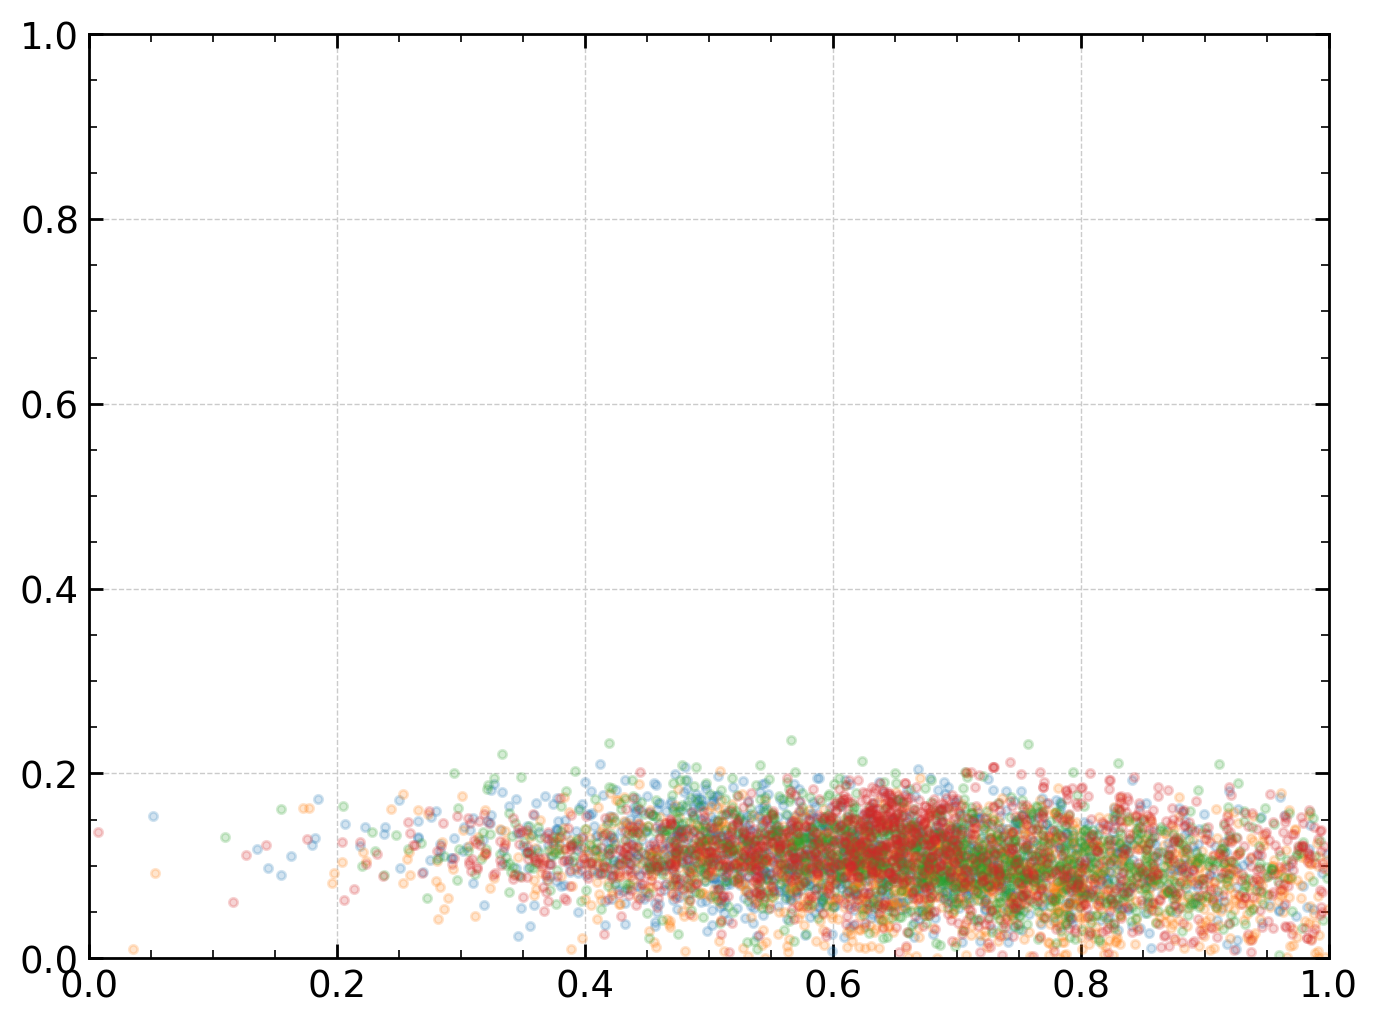

In [24]:
for m in models:
    t = samples[m]
    print(m, t.shape)
    plt.plot(t[:, 0], t[:, 1], '.', alpha=0.2)
plt.xlim(0,1)
plt.ylim(0,1)